#### Fast Hand Tracking with Google Mediapipe (it has free use copyright even for commercial purpose!)

In [1]:
# Ref: https://github.com/google/mediapipe
# Ref: https://www.youtube.com/watch?v=NZde8Xt78Iw&ab_channel=Murtaza%27sWorkshop-RoboticsandAI

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import cv2
import mediapipe as mp
from IPython.display import clear_output

In [2]:
import sys
sys.path.append('C:/Users/Mafeus/Desktop/Git_Repos/OpenCV')
import OpCV_Utils

In [16]:
mpDraw = mp.solutions.drawing_utils
mpHands = mp.solutions.hands
hands = mpHands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)

In [17]:
thumb         = [1, 2, 3, 4]
index_finger  = [5, 6, 7, 8]
middle_finger = [9, 10, 11, 12]
ring_finger   = [13, 14, 15, 16]
pinky_finger  = [17, 18, 19, 20]

In [18]:
# Load Video:
video = 'libras_2.mp4'
cap = cv2.VideoCapture(video)
video_fps = cap.get(cv2.CAP_PROP_FPS)

while True:
    
    start = time.time()
    
    success, frame = cap.read()
        
    if not success:
        print('Server OFF')
        break
        
    frame = cv2.resize(frame, (0,0), None, 0.8, 0.8)    
    
    #####################################################################################################################
    
    results = hands.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    if results.multi_hand_landmarks: 
        for handLandmarks in results.multi_hand_landmarks:
            
            landmarks_list = []
            
            for id, lm in enumerate(handLandmarks.landmark):
                h, w, c = frame.shape
                cX, cY  = int(lm.x*w), int(lm.y*h)
                
                cv2.circle(frame, (cX, cY), 1, (255, 0, 0), cv2.FILLED)
                cv2.putText(frame, '{}'.format(id), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (150, 0, 0), 1)
                
                landmarks_list.append([id, cX, cY])
    
            mpDraw.draw_landmarks(frame, handLandmarks, mpHands.HAND_CONNECTIONS)
    
    #####################################################################################################################
    
    # Keyboard Controls:
    
    key = cv2.waitKey(1) or 0xff   
        
    if key == ord('k'):
        break
        
    if key == ord('p'):
        cv2.waitKey(0)
       
    end = time.time()

    frame_time = (end - start) + 0.0001
    fps = np.floor(1/frame_time)
            
    cv2.putText(frame, "FPS: {}".format(fps), (30,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
    cv2.imshow("Output", frame)
    
cv2.destroyAllWindows()
cap.release()

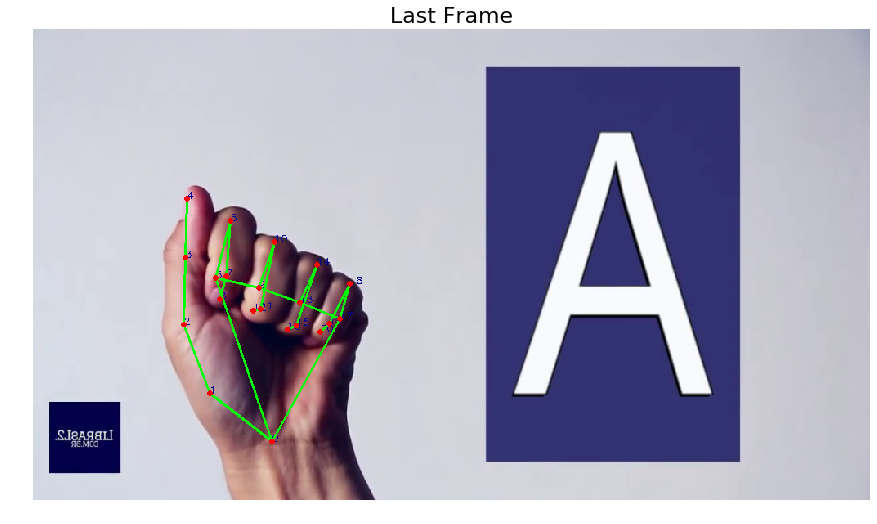

In [11]:
OpCV_Utils.show_single_img_plt((cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)), 'Last Frame', fig_size=(15,15))

In [3]:
class mp_hands_detection:
    
    def __init__(self, static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5, min_tracking_confidence=0.5):
        
        self.mpDraw  = mp.solutions.drawing_utils
        self.mpHands = mp.solutions.hands
        
        self.static_image_mode        = static_image_mode
        self.max_num_hands            = max_num_hands 
        self.min_detection_confidence = min_detection_confidence
        self.min_tracking_confidence  = min_tracking_confidence
        
        self.hands = self.mpHands.Hands(static_image_mode = static_image_mode, 
                                        max_num_hands = max_num_hands, 
                                        min_detection_confidence = min_detection_confidence,
                                        min_tracking_confidence = min_tracking_confidence)
        
    def hand_process(self, frame_bgr, draw=True):
        
        self.frame_bgr = frame_bgr
        self.draw = draw
    
        self.results = self.hands.process(cv2.cvtColor(self.frame_bgr, cv2.COLOR_BGR2RGB))
        
        self.landmarks_list = []
        self.landmarks_list_no_scaled = []
    
        if self.results.multi_hand_landmarks: 
            
            for handLandmarks in self.results.multi_hand_landmarks:

                self.landmarks_list = []
                self.landmarks_list_no_scaled = []

                for id, lm in enumerate(handLandmarks.landmark):
                    h, w, c = self.frame_bgr.shape
                    cX, cY  = int(lm.x*w), int(lm.y*h)

                    cv2.circle(self.frame_bgr, (cX, cY), 1, (255, 0, 0), cv2.FILLED)
                    cv2.putText(self.frame_bgr, '{}'.format(id), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (150, 0, 0), 1)

                    self.landmarks_list.append([id, cX, cY])
                    self.landmarks_list_no_scaled.append([id, lm.x, lm.y])

                if self.draw:
                    self.mpDraw.draw_landmarks(self.frame_bgr, handLandmarks, self.mpHands.HAND_CONNECTIONS)
                    
                return self.landmarks_list, self.landmarks_list_no_scaled


In [4]:
# Load Video:
video = 'libras_2.mp4'
cap = cv2.VideoCapture(video)
video_fps = cap.get(cv2.CAP_PROP_FPS)

my_hands = mp_hands_detection()

while True:
    
    start = time.time()
    
    success, frame = cap.read()
        
    if not success:
        print('Server OFF')
        break
        
    frame = cv2.resize(frame, (0,0), None, 0.8, 0.8)    
    
    #####################################################################################################################
    
    lm, lm_no_scaled = my_hands.hand_process(frame_bgr=frame, draw=True)
    
    clear_output(wait=True)
    
    print('Lm:', lm[:2])
    print('Lm No Scaled:', lm_no_scaled[:2])
        
    #####################################################################################################################
    
    # Keyboard Controls:
    
    key = cv2.waitKey(1) or 0xff   
        
    if key == ord('k'):
        break
        
    if key == ord('p'):
        cv2.waitKey(0)
       
    end = time.time()

    frame_time = (end - start) + 0.0001
    fps = np.floor(1/frame_time)
            
    cv2.putText(frame, "FPS: {}".format(fps), (30,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
    cv2.imshow("Output", frame)
    
cv2.destroyAllWindows()
cap.release()

Lm: [[0, 713, 516], [1, 791, 463]]
Lm No Scaled: [[0, 0.6966659426689148, 0.8968846797943115], [1, 0.7726955413818359, 0.8048022389411926]]
